# 1 建立神经网络

In [1]:
import numpy as np


In [32]:
class Neural_Network(object):
    def __init__(self):
        self.inputLayerSize  = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        
        # define parameters - initial value -random
        
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        
    def forword(self,X):
        # propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        y_hat =self.sigmoid(self.z3)
        return y_hat
    
    def sigmoid(self,z):
        # sigmoid function
        return 1/(1+np.exp(-z))
    

* 归一化数据

In [25]:
X = np.array(([3,5],[5,1],[10,2]),dtype=float)
y = np.array(([70],[80],[90]),dtype = float)

X = X/ np.amax(X,axis=0)
y = y/100



In [19]:
X


array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [20]:
y

array([[0.7],
       [0.8],
       [0.9]])

![](https://github.com/LiuChuang0059/ML_Project/blob/master/Picture/%E8%87%AA%E5%8A%A8%E7%BC%96%E7%A0%81%E6%9C%BA.jpg)


In [33]:
NN= Neural_Network()
y_hat = NN.forword(X)

In [34]:
y_hat

array([[0.87762491],
       [0.84036084],
       [0.85817559]])

In [35]:
y

array([[0.7],
       [0.8],
       [0.9]])

* 因为初始值是随机的，所以可以看见结果相差很大


# 2.进行神经网络训练--cost函数 BP算法

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoidPrime(z):
    # derivatation of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)

In [37]:
def costFunction(self ,X,y):
    self.y_hat = self.forword(X)
    J = 0.5* sum((y-self.y_hat)**2)
    return J



* 求解 损失函数的导数

In [38]:
def costFunctionPrime(self,X,y):
    self.y_hat = self.forword(X)
    delta3 = np.multiply(-(y - self.y_hat)),self.sigmoidPrime(self,z3)
    DJDW2 = np.dot(self.a2.T,delta3)
    
    delta2 = np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
    DJDW1 = np.dot(X.T,delta2)
    
    return DJDW1,DJDW2

    

### 完整的神经网络类


In [53]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_hat = self.sigmoid(self.z3) 
        return y_hat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.y_hat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

迭代计算cost


In [54]:
NN = Neural_Network()

In [55]:
cost1 = NN.costFunction(X,y)


In [56]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [57]:
dJdW1


array([[ 3.11003600e-02,  8.61415422e-05, -5.09579832e-02],
       [ 2.14190795e-02,  6.20373319e-05, -3.61826068e-02]])

In [58]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [59]:
print(cost1 ,cost2)


[0.08827404] [0.19214761]


In [60]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [61]:
print(cost1,cost2,cost3)

[0.08827404] [0.19214761] [0.05362632]


## the popular Broyden-Fletcher-Goldfarb-Shanno numerical optimization algorithm. ---更好的梯度下降

In [62]:
from scipy import optimize


In [63]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [64]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 49
         Gradient evaluations: 49


Text(0,0.5,'Cost')

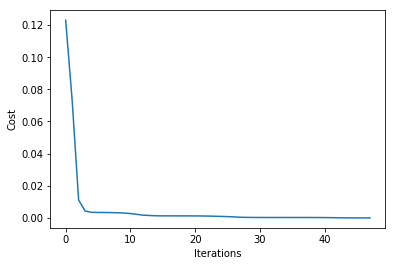

In [70]:
import matplotlib.pyplot as plt
plt.plot(T.J)

plt.xlabel('Iterations')
plt.ylabel('Cost')


In [72]:
NN.forward(X)

array([[0.69997969],
       [0.79998568],
       [0.89999292]])

In [73]:
y

array([[0.7],
       [0.8],
       [0.9]])

### 观察可知道，模型训练误差已经很小

# 对训练好的模型进行测试

In [76]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()


In [77]:
allOutputs = NN.forward(allInputs)

yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

* matplotlib 中等高线画图https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html

# 模型很可能过拟合

分成训练集和测试集

# 参考  https://github.com/stephencwelch/Neural-Networks-Demystified/blob/master/README.md